In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/Users/rubenbroekx/Documents/Projects/radix-co2-reduction


# Tillage Classification - CNN

Tillage classification using a 1-dimensional CNN.

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob
from random import shuffle
from collections import Counter
from pathlib import Path
from sklearn.metrics import confusion_matrix, f1_score

from src.radix_co2_reduction.utils import get_label, get_year, load_data, BANDS
from src.radix_co2_reduction.tillage_detection.models import PixelCNN
from src.radix_co2_reduction.tillage_detection.models.utils import heatmap_field, plot_time_series

## Load Data

Load in all data used for the classification.

In [3]:
# Root data folder
DATA = Path.home() / 'data/agoro/2021-05-10'

In [4]:
# Fetch field-IDs
all_ids = glob(str(DATA / '*/ndti.png'))
all_ids = [int(i.split('/')[-2]) for i in all_ids]

In [5]:
# Load in all data
meta_data = {}
for i in all_ids:
    with open(DATA / f"{i}/meta.json", 'r') as f:
        meta_data[i] = json.load(f)
        
# Extract tillage types
tillage_types = {k:v['tillage'] for k,v in meta_data.items()}

# Get total number of fields
print(f"Total number of data samples:", len(tillage_types))

# Show classes
print(f"Number of samples by class:")
for k,v in Counter(tillage_types.values()).items():
    print(f" - {k}: {v}")

Total number of data samples: 966
Number of samples by class:
 - Conv.-Till: 674
 - No-Till: 292


In [6]:
N_TEST = 30  # TODO

# Split into training and testing
no_till = [field_id for field_id,label in tillage_types.items() if label == 'No-Till']
conv_till = [field_id for field_id,label in tillage_types.items() if label == 'Conv.-Till']

# Test-set
test = no_till[:N_TEST] + conv_till[:N_TEST]
print(f"Test-size: {len(test)}")
train = no_till[N_TEST:] + conv_till[N_TEST:]
print(f"Train-size: {len(train)}")

Test-size: 60
Train-size: 906


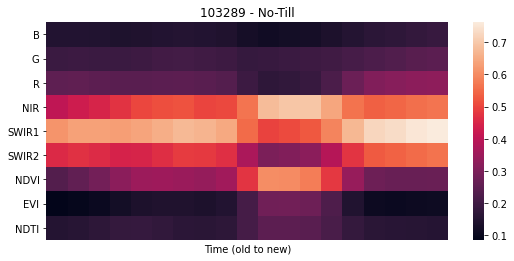

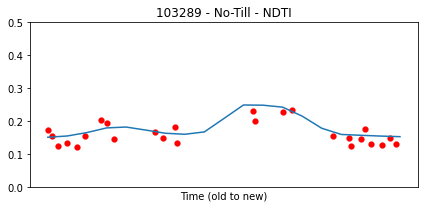

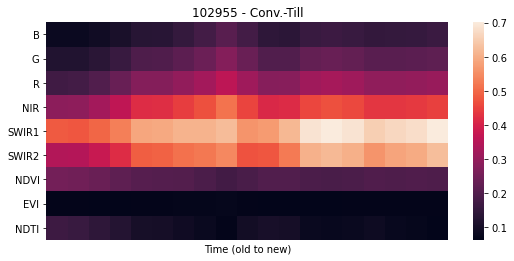

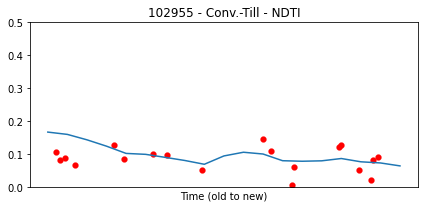

In [7]:
# Visualise the data fields (is how the PixelCNN will see it)
for field_id in (no_till[1], conv_till[2]):
    heatmap_field(DATA / f'{field_id}')
    plot_time_series(DATA / f'{field_id}', band='NDTI', y_max=.5)

## Train the Classifier

Train a 1-dimensional CNN on pixel-level data.

In [8]:
model = PixelCNN(
    models_path=Path.cwd() / 'models'
)

In [9]:
model.train(
    field_ids=train,
    data_path=DATA,
    batch_size=32*1024,
)

Processing: 100%|██████████| 91/91 [00:20<00:00,  4.52it/s]
/Users/rubenbroekx/opt/miniconda3/envs/radix-co2-reduction-env/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: Checkpoint directory /Users/rubenbroekx/Documents/Projects/radix-co2-reduction/models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type              | Params
-------------------------------------------------
0 | conv1      | Conv1d            | 1.5 K 
1 | pool       | MaxPool1d         | 0     
2 | conv2      | Conv1d            | 6.2 K 
3 | adapt_pool | AdaptiveMaxPool1d | 0     
4 | dropout    | Dropout           | 0     
5 | fc         | Linear            | 130   
-------------------------------------------------
7.8 K     Trainable params
0         Non-trainable params
7.8 K     Total params
0.031     Total estimated model params size (MB)
/Users/rubenbroekx/opt/minicond

Validation sanity check: 0it [00:00, ?it/s]

/Users/rubenbroekx/opt/miniconda3/envs/radix-co2-reduction-env/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [11]:
model.eval(
    field_ids=test,
    data_path=DATA,
    batch_size=4*1024,
)

Processing: 100%|██████████| 60/60 [00:06<00:00,  9.55it/s]
/Users/rubenbroekx/opt/miniconda3/envs/radix-co2-reduction-env/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

    Loss: 0.52865
Accuracy: 0.76051


In [12]:
c = {
    'correct': [],
    'incorrect': [],
    'broken': []
}
for field_id in tqdm(test, desc='Evaluating'):
    path = DATA / f'{field_id}'
    sample = load_data(path)
    year = get_year(path)
    pred = model(sample, year=year)
    true = get_label(path)
    if pred is None:
        c['broken'].append(field_id)
    elif pred == true:
        c['correct'].append(field_id)
    else:
        c['incorrect'].append(field_id)
        
print(f"Test evaluation:")
print(f" -   Number correct: {len(c['correct'])}")
print(f" - Number incorrect: {len(c['incorrect'])}")
print(f" -    Number broken: {len(c['broken'])}")
print(f" -         Accuracy: {100*len(c['correct'])/len(c['correct']+c['incorrect']):.2f}%")

Evaluating: 100%|██████████| 60/60 [00:32<00:00,  1.87it/s]

Test evaluation:
 -   Number correct: 47
 - Number incorrect: 13
 -    Number broken: 0
 -         Accuracy: 78.33%


## Model Investigation

Investigate the model in order to try to find some anomalies / points of improvement.

### CNN features

Plot the CNN features of the first and second `Conv1d` layers.

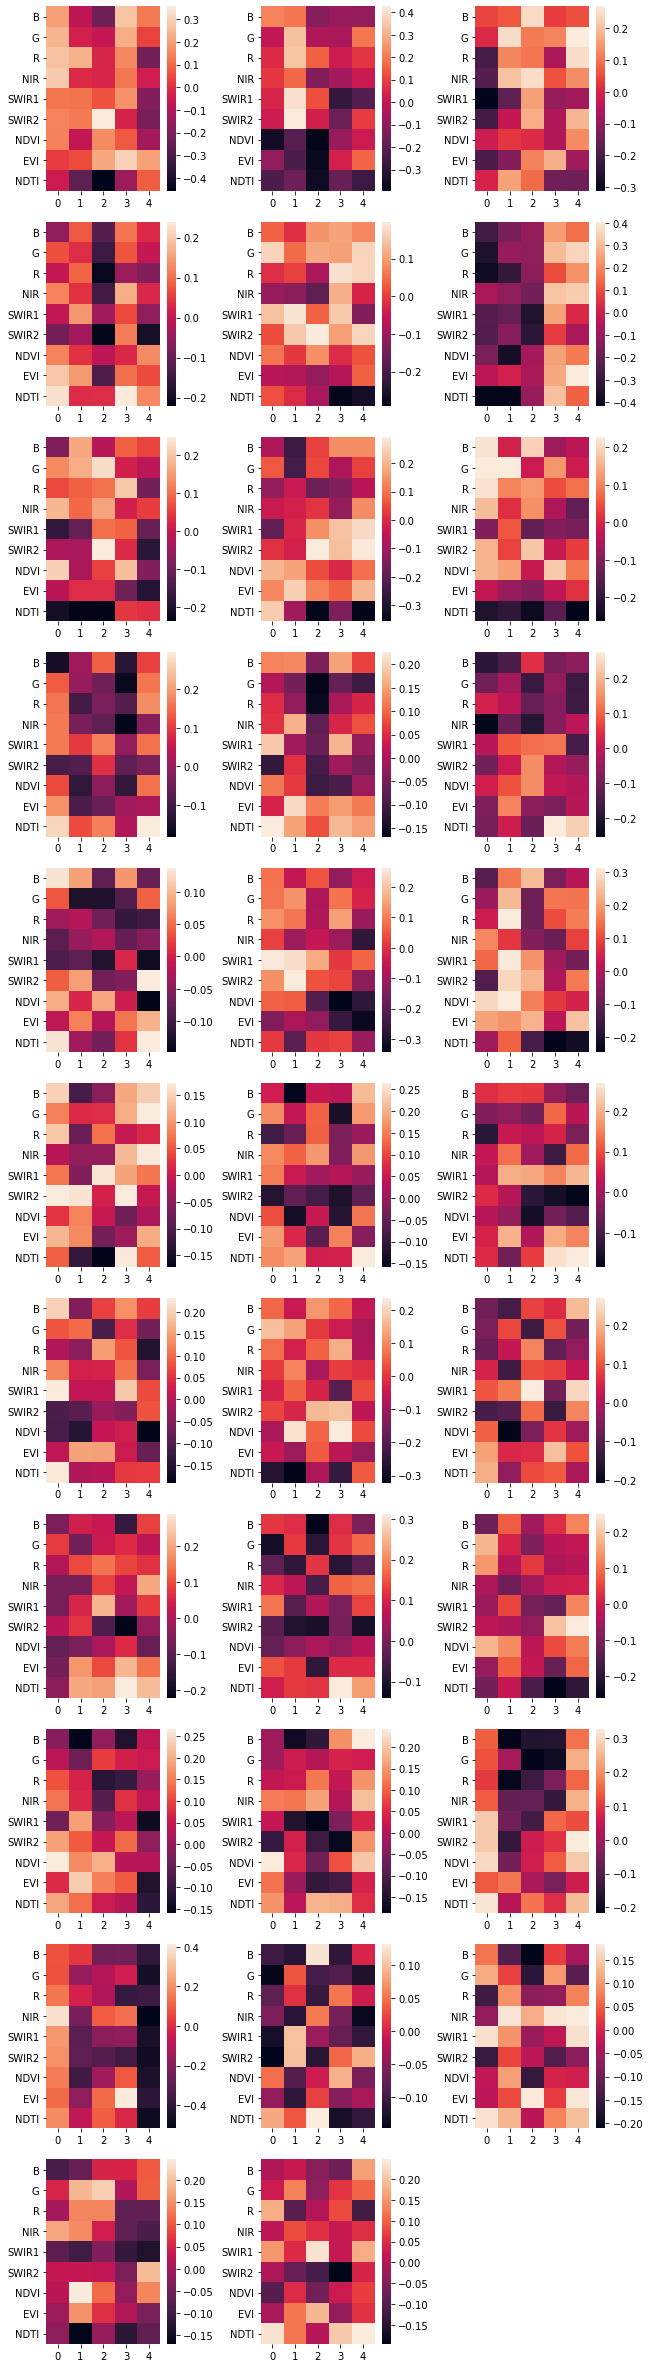

In [13]:
plt.figure(figsize=(9,33))
for i, weight in enumerate(model.clf.conv1.weight):
    plt.subplot(11,3,i+1)
    sns.heatmap(weight.detach().numpy())
    plt.yticks([i+.5 for i in range(len(BANDS))], BANDS, rotation=0)
plt.tight_layout()
plt.show()

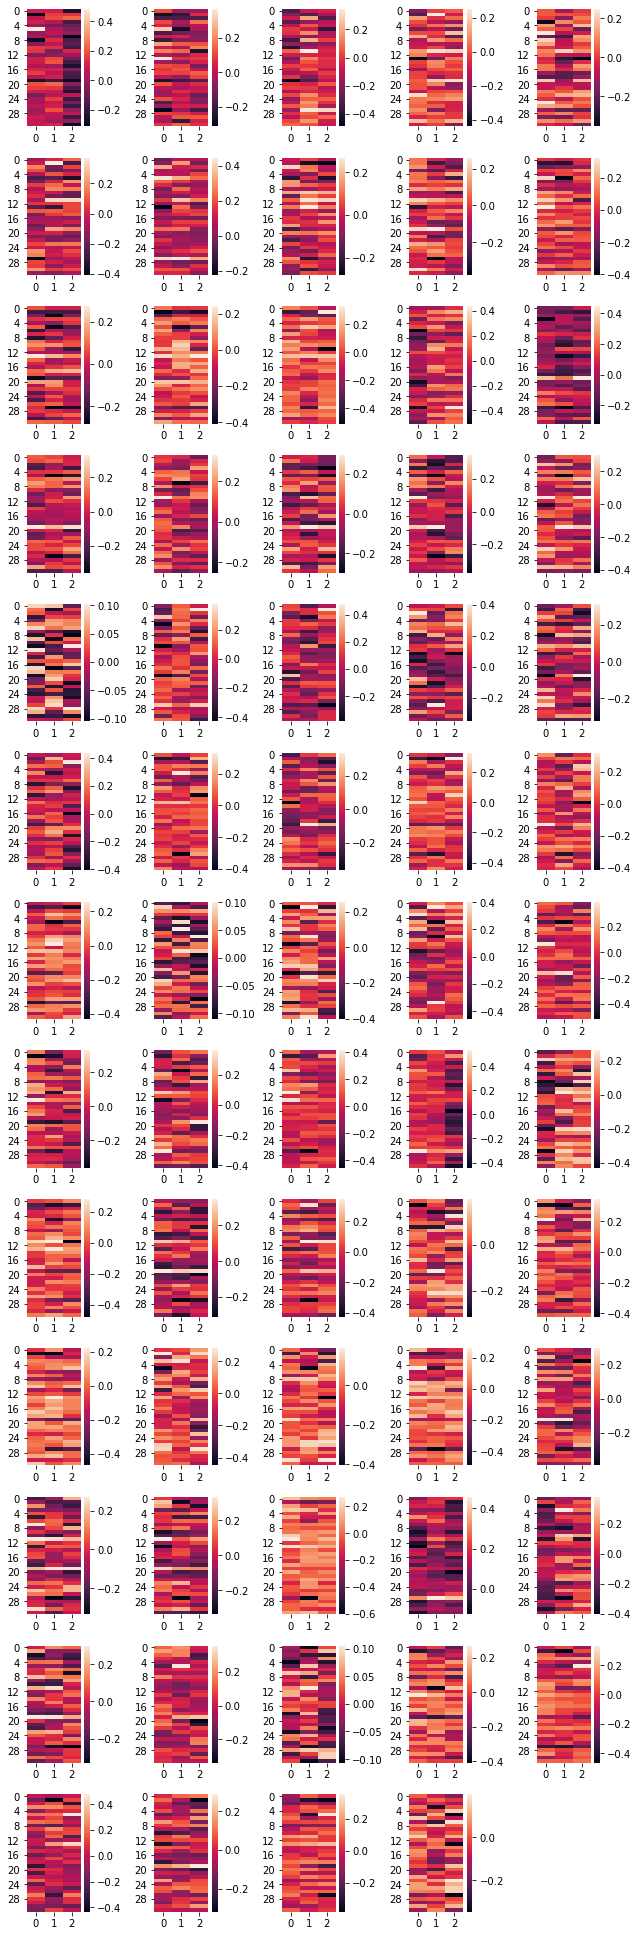

In [14]:
plt.figure(figsize=(9,27))
for i, weight in enumerate(model.clf.conv2.weight):
    plt.subplot(13,5,i+1)
    sns.heatmap(weight.detach().numpy())
plt.tight_layout()
plt.show()

## Validation certainty

See how "certain" the model is in classifying the validation labels.

In [15]:
from sklearn.model_selection import train_test_split
field_labels = [get_label(DATA / f"{i}") for i in train]
_, val = train_test_split(
        train,
        test_size=.1,
        stratify=field_labels,
        random_state=42,
)

In [22]:
true_pred = []
false_pred = []
incorrect = []
for field_id in tqdm(val, desc='Evaluating'):
    path = DATA / f'{field_id}'
    sample = load_data(path)
    year = get_year(path)
    true = get_label(path)
    pred = model.get_pixel_probs(sample, year=year)
    
    # Check if correct
    if ((sum(pred) / len(pred)) >= .5) != true:
        incorrect.append(field_id)
    
    # Save certainty
    if pred is not None and get_label(path):
        true_pred.append(pred)
    elif pred is not None:
        false_pred.append(pred)
        
print(f"Incorrect field-IDs: {incorrect}")

Evaluating: 100%|██████████| 91/91 [00:42<00:00,  2.13it/s]

Incorrect field-IDs: [103407, 94114, 68220, 94076, 93731, 80632, 70445, 103424, 68564, 103039, 93760, 79992, 94555, 94100, 102806, 67993]


In [23]:
avg_s = []
max_s = []
min_s = []
for t in true_pred:
    t = sorted(t)
    avg_s.append(sum(t)/len(t))
    max_s.append(t[int(.9*len(t))])
    min_s.append(t[int(.1*len(t))])
print('avg',sum(avg_s)/len(avg_s))
print('max',sum(max_s)/len(max_s))
print('min',sum(min_s)/len(min_s))

avg 0.7329374375149398
max 0.8097781856472676
min 0.6527120458391996


In [24]:
avg_s = []
max_s = []
min_s = []
for t in false_pred:
    t = sorted(t)
    avg_s.append(sum(t)/len(t))
    max_s.append(t[int(.9*len(t))])
    min_s.append(t[int(.1*len(t))])
print('avg',sum(avg_s)/len(avg_s))
print('max',sum(max_s)/len(max_s))
print('min',sum(min_s)/len(min_s))

avg 0.26402752859556256
max 0.3386433023529557
min 0.2002250999928667


In [27]:
# Get certainties of misclassified fields
for field_id in incorrect:
    path = DATA / f'{field_id}'
    sample = load_data(path)
    year = get_year(path)
    true = get_label(path)
    pred = model.get_pixel_probs(sample, year=year)
    
    print(f"\nIncorrectly classified field {field_id}")
    print(f" - Label: {true}")
    print(f" - Prediction: {(sum(pred)/len(pred))>=.5}")
    print(f" - Certainty of tillage event: {100*sum(pred)/len(pred):.2f}%")


Incorrectly classified field 103407
 - True: False
 - Pred: True
 - Certainty of tillage event: 96.89%

Incorrectly classified field 94114
 - True: True
 - Pred: False
 - Certainty of tillage event: 46.03%

Incorrectly classified field 68220
 - True: False
 - Pred: True
 - Certainty of tillage event: 71.18%

Incorrectly classified field 94076
 - True: True
 - Pred: False
 - Certainty of tillage event: 16.83%

Incorrectly classified field 93731
 - True: True
 - Pred: False
 - Certainty of tillage event: 33.99%

Incorrectly classified field 80632
 - True: False
 - Pred: True
 - Certainty of tillage event: 96.10%

Incorrectly classified field 70445
 - True: True
 - Pred: False
 - Certainty of tillage event: 23.64%

Incorrectly classified field 103424
 - True: True
 - Pred: False
 - Certainty of tillage event: 20.97%

Incorrectly classified field 68564
 - True: False
 - Pred: True
 - Certainty of tillage event: 70.68%

Incorrectly classified field 103039
 - True: True
 - Pred: False
 - Ce

In [ ]:
# c = {
#     'correct': [],
#     'incorrect': [],
# }
# for field_id in tqdm(test):
#     path = DATA / f'{field_id}'
#     sample = load_data(path)
#     year = get_year(path)
#     true = get_label(path)
#     pred = model(sample, year=year)
#     if pred == true:
#         c['correct'].append(field_id)
#     else:
#         c['incorrect'].append(field_id)
#         print(f'Incorrect testing field: {field_id} (true: {true}, pred: {pred})')
        
# print(f"Test evaluation:")
# print(f" -   Number correct: {len(c['correct'])}")
# print(f" - Number incorrect: {len(c['incorrect'])}")
# print(f" -         Accuracy: {100*len(c['correct'])/len(c['correct']+c['incorrect']):.2f}%")